# Raisin Binary Classification Using ML

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d nimapourmoradi/raisin-binary-classification

Dataset URL: https://www.kaggle.com/datasets/nimapourmoradi/raisin-binary-classification
License(s): other
100%|█████████████████████████████████████████| 110k/110k [00:00<00:00, 159kB/s]
100%|█████████████████████████████████████████| 110k/110k [00:00<00:00, 159kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/DeepLearning/Raisin Binary Classification/raisin-binary-classification.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/DeepLearning/Raisin Binary Classification')
zip_ref.close()

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Raisin_Dataset.csv')

In [3]:
df.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.shape

(900, 8)

In [5]:
df.size

7200

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [8]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

Area               900
MajorAxisLength    900
MinorAxisLength    900
Eccentricity       900
ConvexArea         896
Extent             900
Perimeter          900
Class                2
dtype: int64

In [11]:
df['Class'].unique()    

array(['Kecimen', 'Besni'], dtype=object)

In [12]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

## Data Visualization

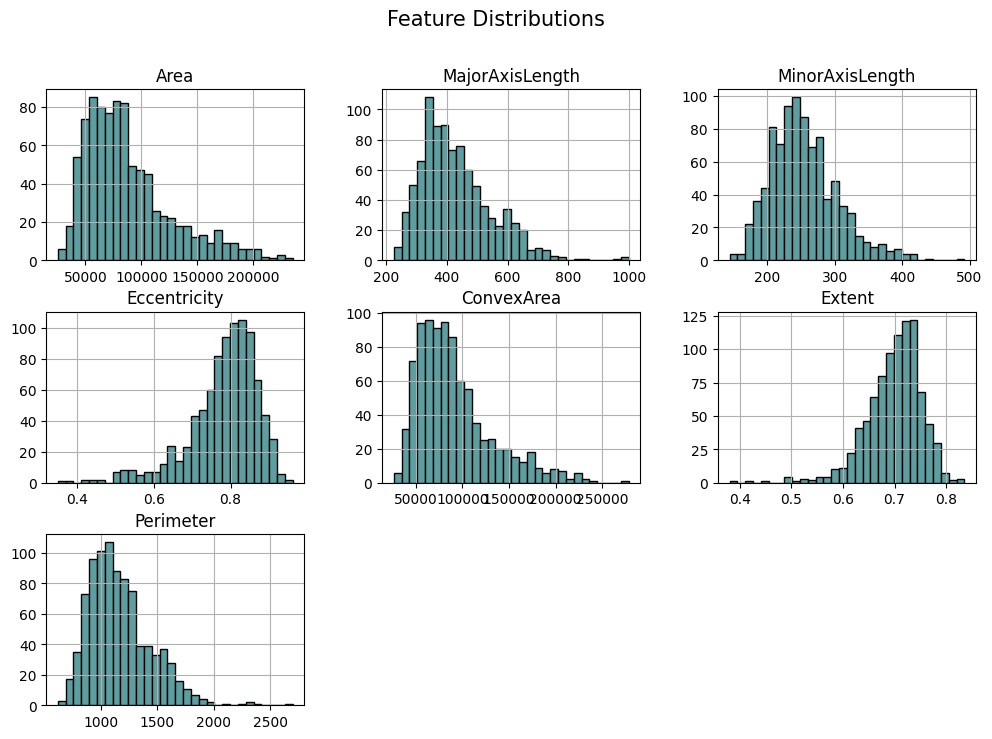

In [4]:
# Histogram for each feature

df.hist(figsize=(12, 8), bins=30, edgecolor='black', color='cadetblue', linewidth=1.0)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

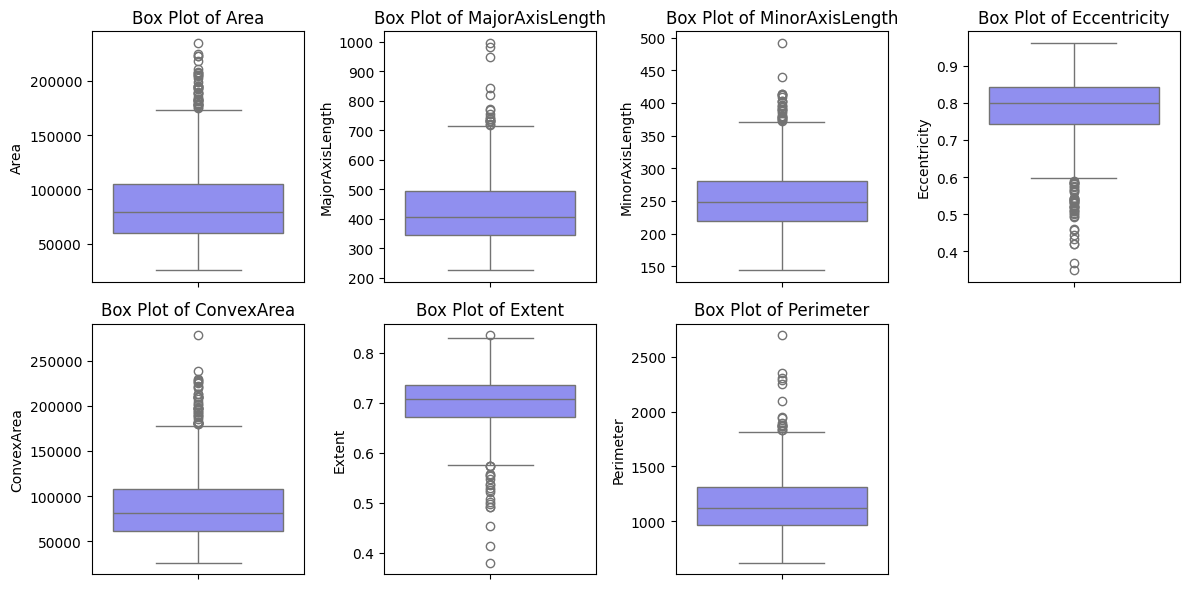

In [ ]:
# Box Plot for each feature

features = df.columns.drop(['Class'])

plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[feature], palette='cool')
    plt.title(f"Box Plot of {feature}")
    plt.tight_layout()

plt.show()

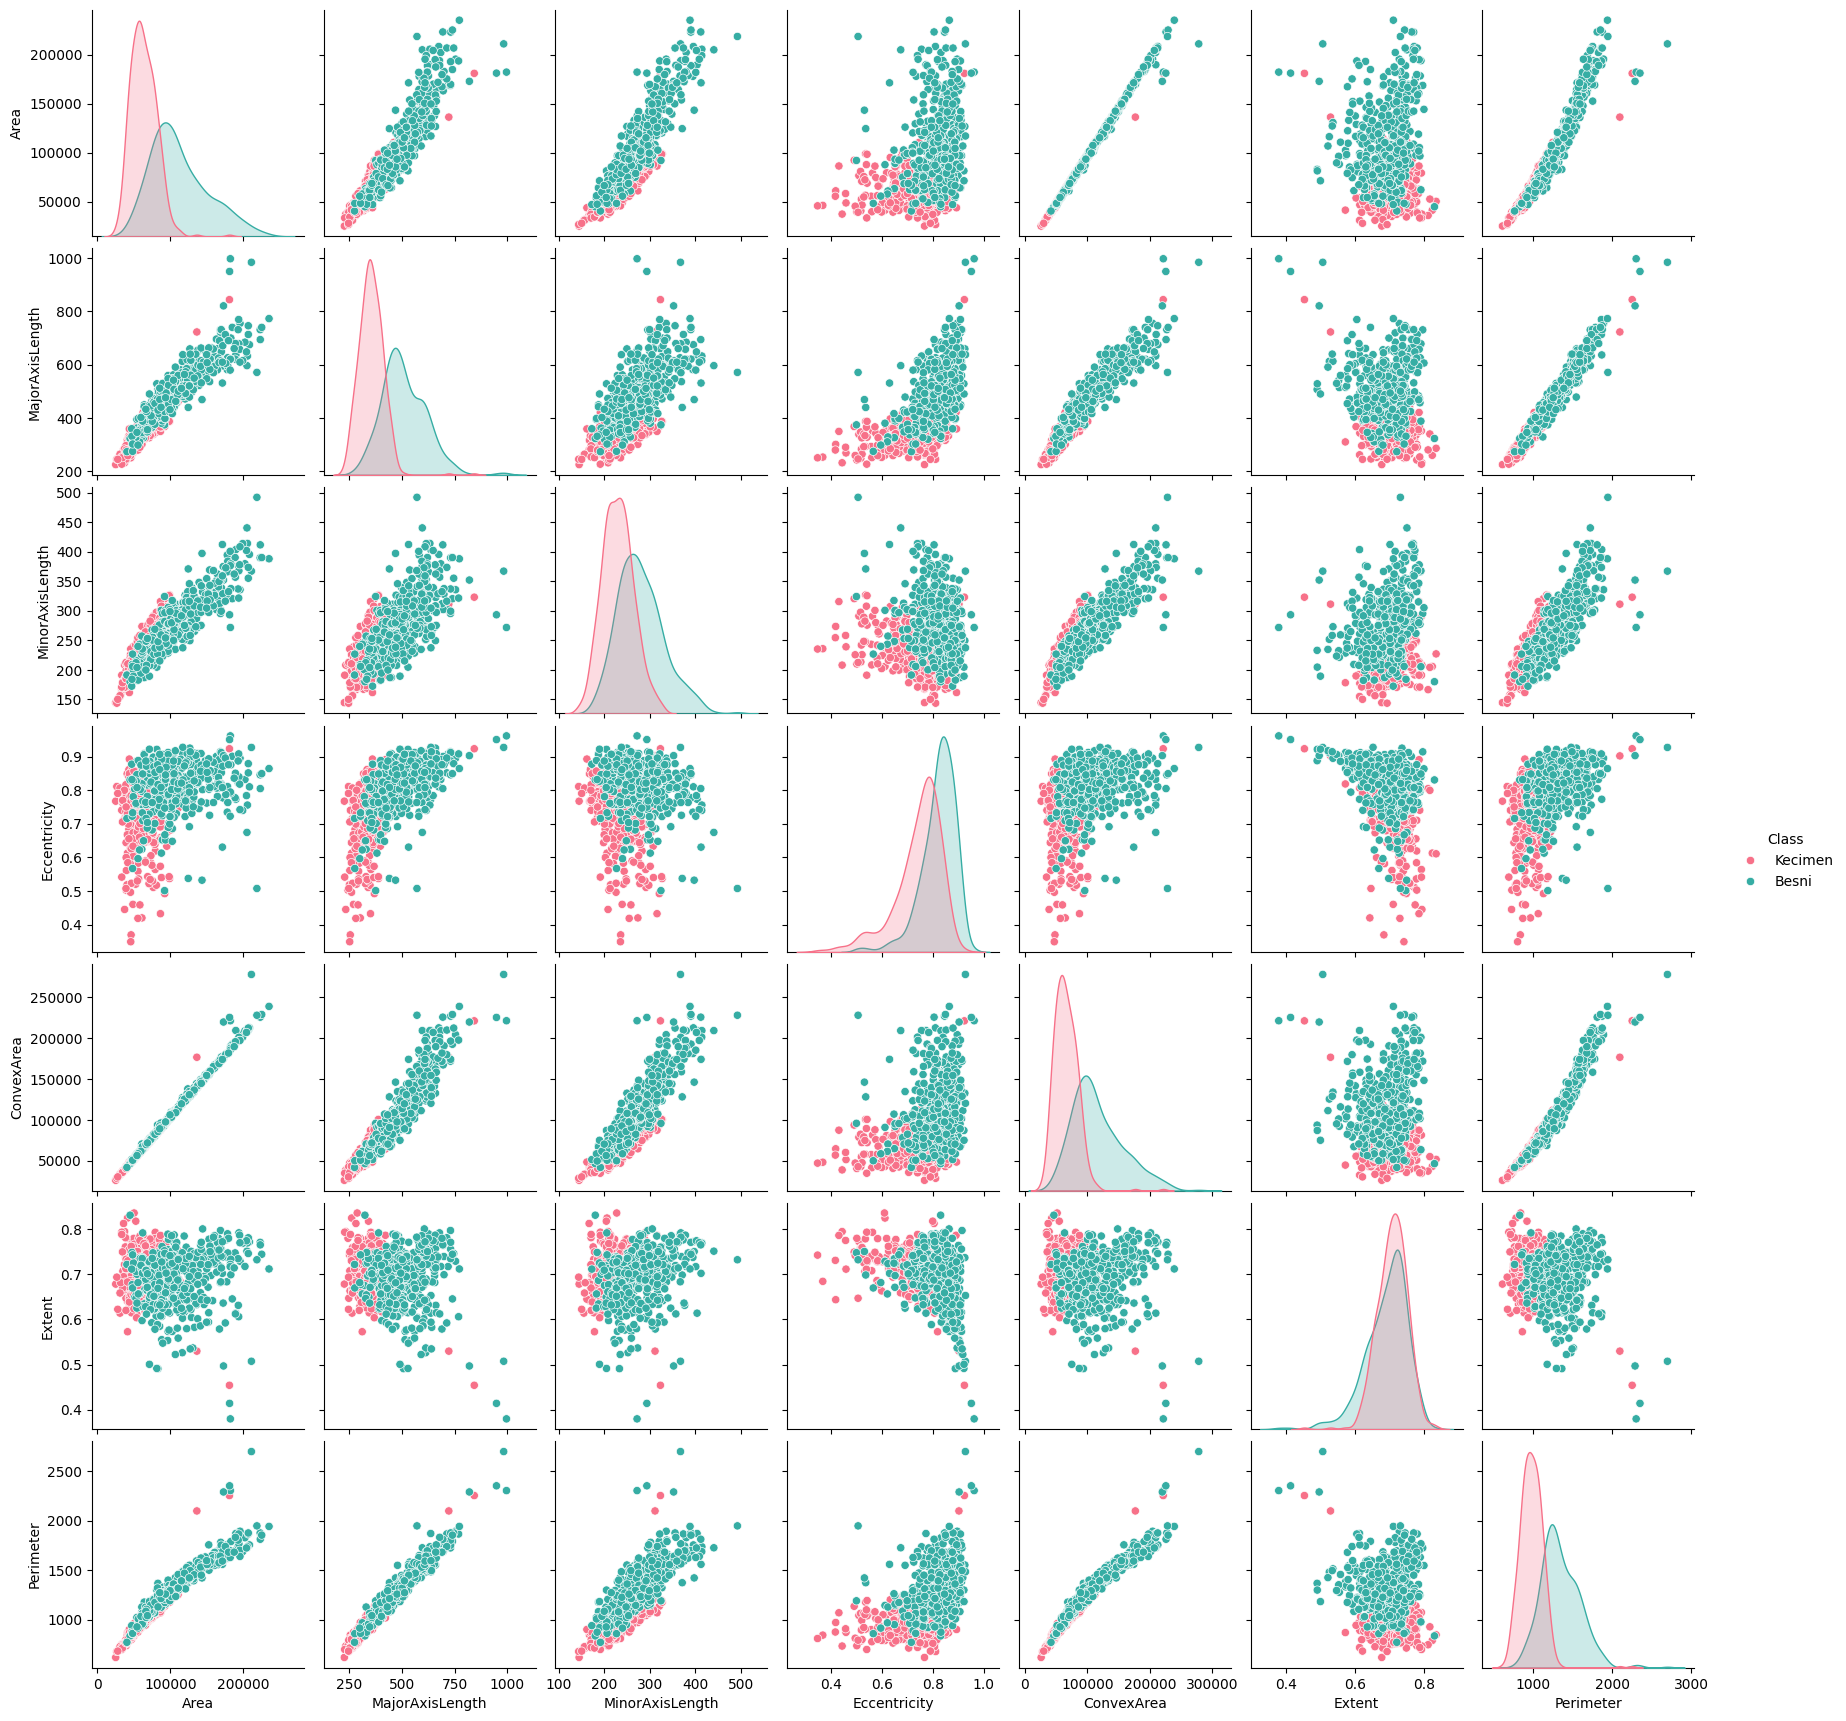

In [13]:
# Pairplot for feature relationships

sns.pairplot(df, hue="Class", diag_kind="kde", palette="husl")
plt.show()

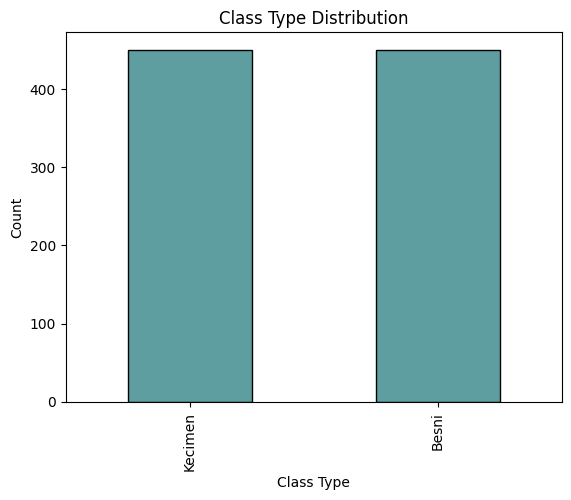

In [14]:
# Bar Plot for Class Type Count

df['Class'].value_counts().plot(kind='bar', color='cadetblue', edgecolor='black')
plt.title("Class Type Distribution")
plt.xlabel("Class Type")
plt.ylabel("Count")
plt.show()

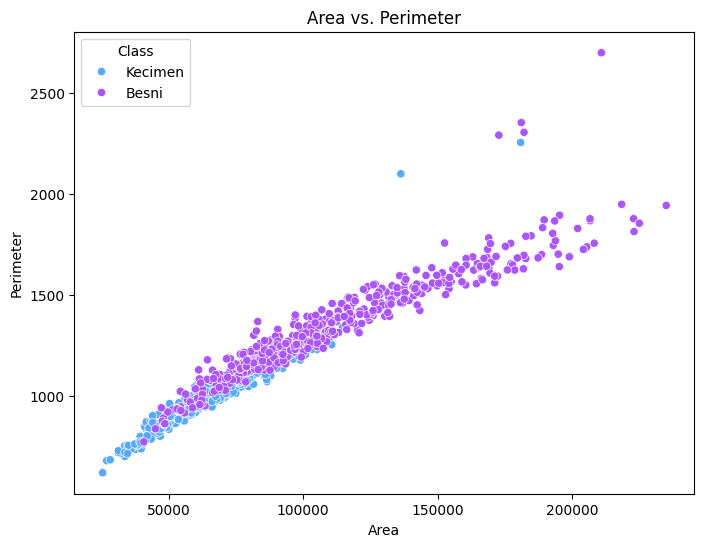

In [14]:
# Scatter Plot for Area vs. Perimeter

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Area"], y=df["Perimeter"], hue=df["Class"], palette="cool")
plt.title("Area vs. Perimeter")
plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.show()

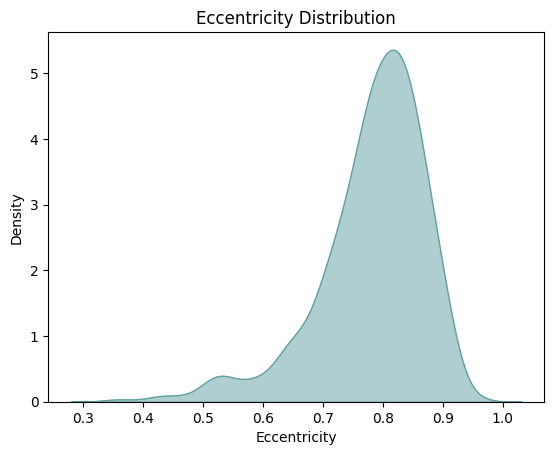

In [16]:
# KDE Plot for Eccentricity

sns.kdeplot(df["Eccentricity"], fill=True, color="cadetblue", alpha=0.5)
plt.title("Eccentricity Distribution")
plt.xlabel("Eccentricity")
plt.show()

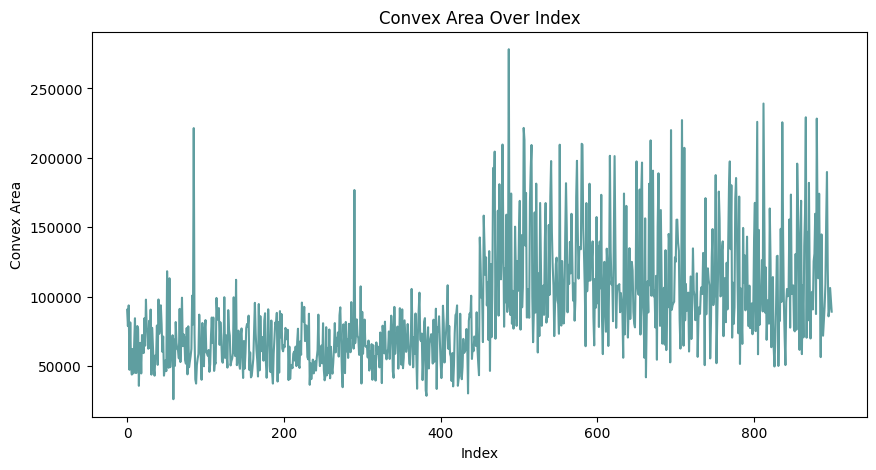

In [18]:
# Line Plot for ConvexArea Over Index

plt.figure(figsize=(10, 5))
sns.lineplot(x=df.index, y=df["ConvexArea"], color='cadetblue')
plt.title("Convex Area Over Index")
plt.xlabel("Index")
plt.ylabel("Convex Area")
plt.show()

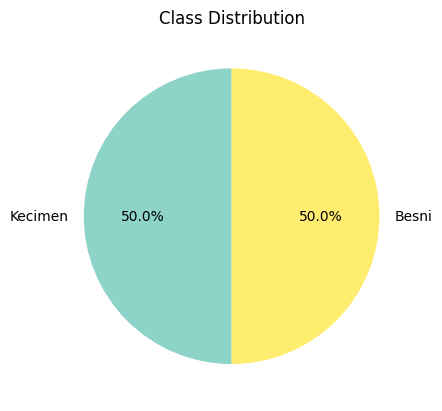

In [19]:
# Class Distribution using Pie Chart

df["Class"].value_counts().plot(kind='pie', autopct='%1.1f%%', cmap="Set3", startangle=90)
plt.ylabel("")
plt.title("Class Distribution")
plt.show()

## Data Preprocessing

In [15]:
# Removing Outlier using IQR method

def replace_outliers_with_bounds(df):
    
    numeric_columns = df.drop("Class", axis = 1)
    
    for col in numeric_columns:
        feature = df[col]
        q1 = feature.quantile(0.25)
        q3 = feature.quantile(0.75)
        IQR = q3 - q1
        lower_bound = float(q1 - 1.5 * IQR) 
        upper_bound = float(q3 + 1.5 * IQR)  

        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    return df

df = replace_outliers_with_bounds(df)

In [16]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Class'] = le.fit_transform(df['Class'])

In [17]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify = y, test_size = 0.12, random_state = 42)

In [19]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Model Building

In [20]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [21]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [22]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.9074074074074074, 0.8981481481481481, 0.8796296296296297, 0.8796296296296297, 0.8796296296296297, 0.8703703703703703, 0.8518518518518519, 0.8240740740740741, 0.9074074074074074]


## Model Evaluation

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90        54
           1       0.85      0.98      0.91        54

    accuracy                           0.91       108
   macro avg       0.92      0.91      0.91       108
weighted avg       0.92      0.91      0.91       108

Confusion Matrix:
 [[45  9]
 [ 1 53]]


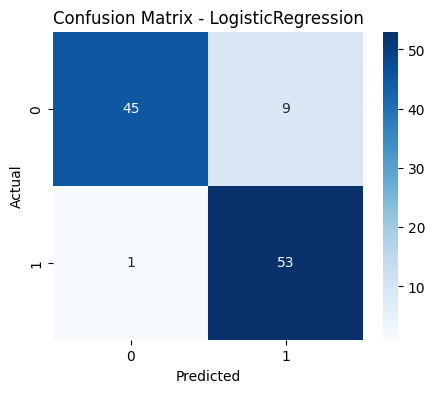

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89        54
           1       0.84      0.98      0.91        54

    accuracy                           0.90       108
   macro avg       0.91      0.90      0.90       108
weighted avg       0.91      0.90      0.90       108

Confusion Matrix:
 [[44 10]
 [ 1 53]]


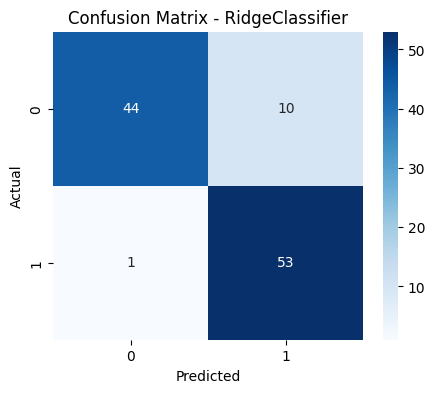

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87        54
           1       0.85      0.93      0.88        54

    accuracy                           0.88       108
   macro avg       0.88      0.88      0.88       108
weighted avg       0.88      0.88      0.88       108

Confusion Matrix:
 [[45  9]
 [ 4 50]]


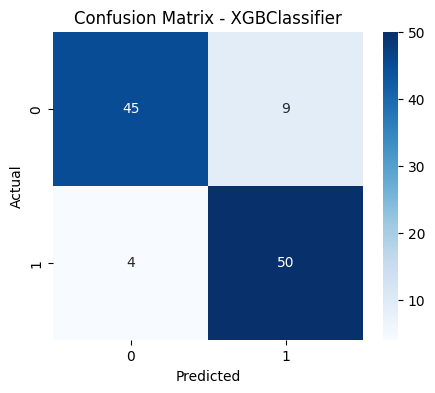

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86        54
           1       0.81      0.96      0.88        54

    accuracy                           0.87       108
   macro avg       0.88      0.87      0.87       108
weighted avg       0.88      0.87      0.87       108

Confusion Matrix:
 [[42 12]
 [ 2 52]]


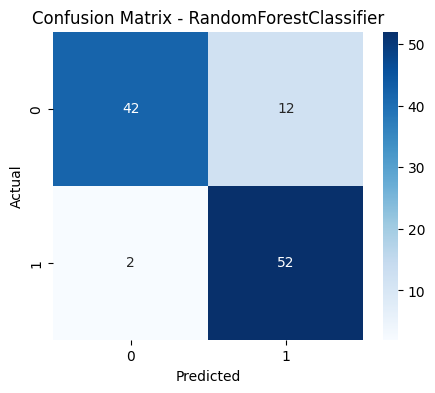

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.80      0.87        54
           1       0.83      0.96      0.89        54

    accuracy                           0.88       108
   macro avg       0.89      0.88      0.88       108
weighted avg       0.89      0.88      0.88       108

Confusion Matrix:
 [[43 11]
 [ 2 52]]


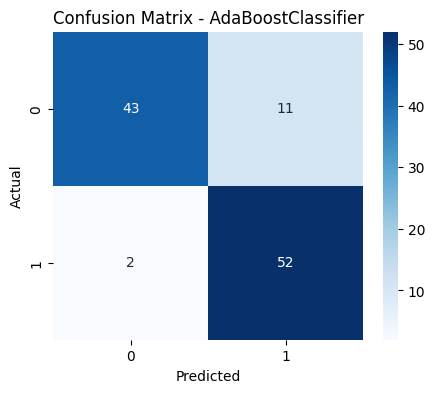

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.76      0.85        54
           1       0.80      0.98      0.88        54

    accuracy                           0.87       108
   macro avg       0.89      0.87      0.87       108
weighted avg       0.89      0.87      0.87       108

Confusion Matrix:
 [[41 13]
 [ 1 53]]


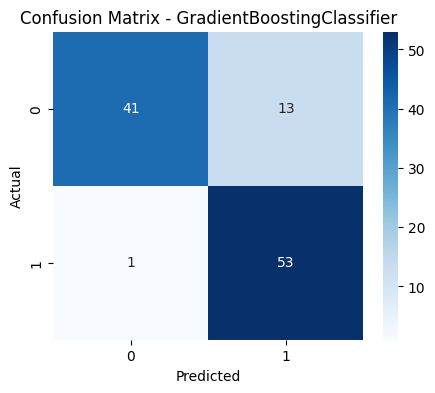

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.86      0.89      0.87        54

    accuracy                           0.87       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.87      0.87      0.87       108

Confusion Matrix:
 [[46  8]
 [ 6 48]]


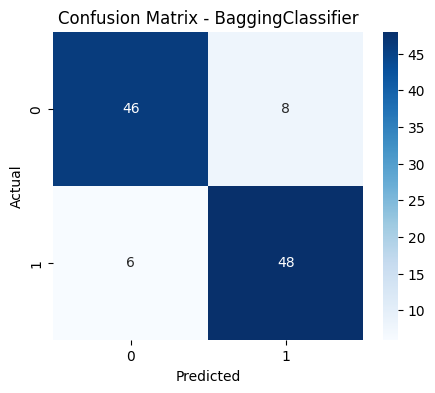

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81        54
           1       0.79      0.85      0.82        54

    accuracy                           0.81       108
   macro avg       0.82      0.81      0.81       108
weighted avg       0.82      0.81      0.81       108

Confusion Matrix:
 [[42 12]
 [ 8 46]]


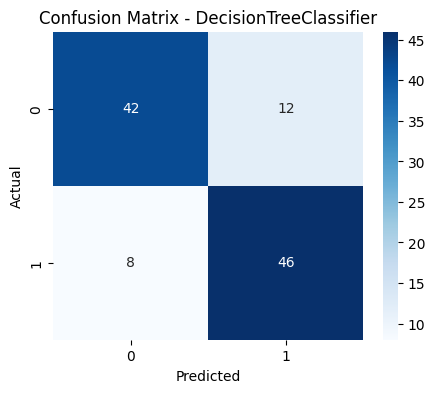

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90        54
           1       0.85      0.98      0.91        54

    accuracy                           0.91       108
   macro avg       0.92      0.91      0.91       108
weighted avg       0.92      0.91      0.91       108

Confusion Matrix:
 [[45  9]
 [ 1 53]]


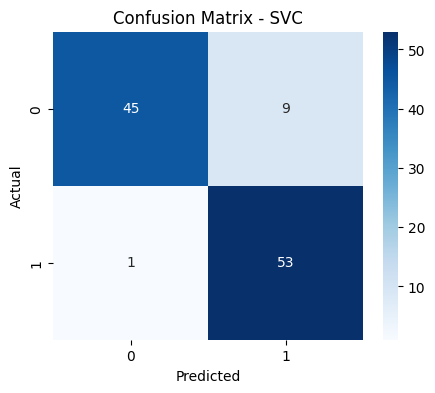

In [24]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()